<a href="https://colab.research.google.com/github/LarhlimiUhp/DS2025/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RÉSULTATS DE LA RÉGRESSION LINÉAIRE
Coefficient (pente) : 2.799 (attendu: 3.0)
Ordonnée à l'origine : 4.143 (attendu: 4.0)
MSE : 0.654
RMSE : 0.809
MAE : 0.591
R² Score : 0.807


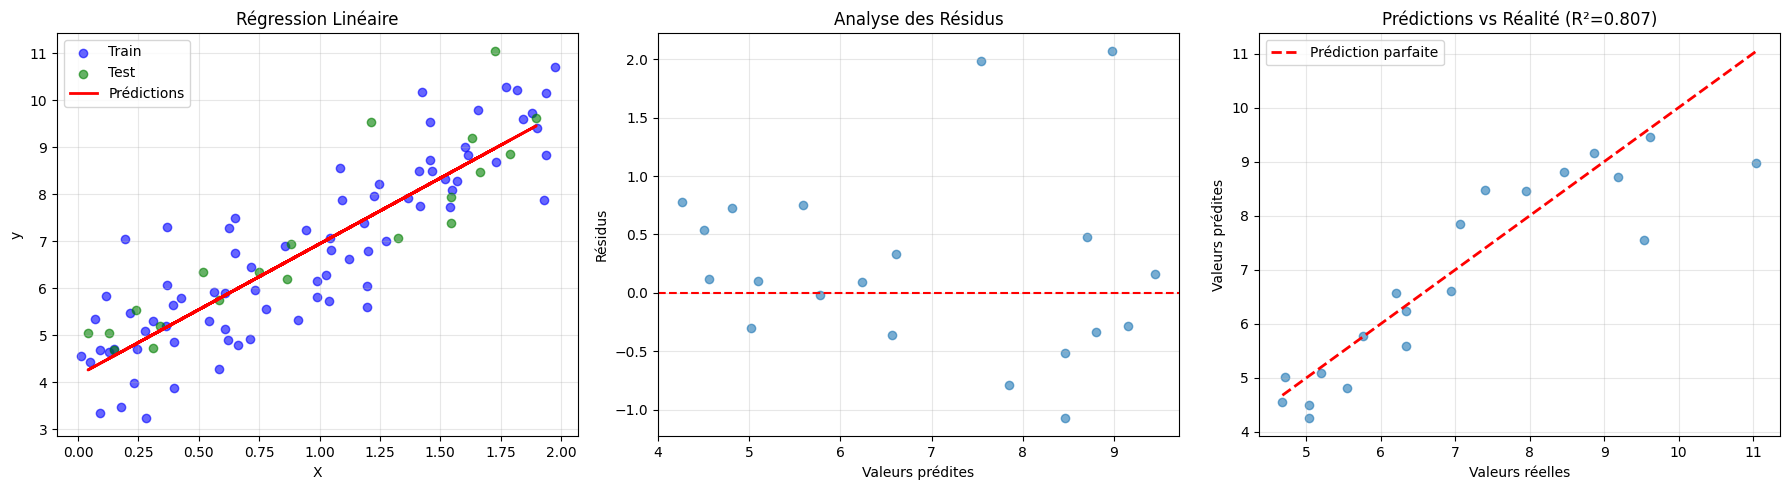

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Génération de données synthétiques avec bruit
np.random.seed(42)
n_samples = 100
X = 2 * np.random.rand(n_samples, 1)  # Feature unique entre 0 et 2
# Relation linéaire : y = 4 + 3x + bruit gaussien
y = 4 + 3 * X + np.random.randn(n_samples, 1)

# Division des données : 80% entraînement, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Création et entraînement du modèle
model = LinearRegression()
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluation des performances
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("=" * 50)
print("RÉSULTATS DE LA RÉGRESSION LINÉAIRE")
print("=" * 50)
print(f"Coefficient (pente) : {model.coef_[0][0]:.3f} (attendu: 3.0)")
print(f"Ordonnée à l'origine : {model.intercept_[0]:.3f} (attendu: 4.0)")
print(f"MSE : {mse:.3f}")
print(f"RMSE : {rmse:.3f}")
print(f"MAE : {mae:.3f}")
print(f"R² Score : {r2:.3f}")
print("=" * 50)

# Visualisation complète
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Données et prédictions
axes[0].scatter(X_train, y_train, color='blue', alpha=0.6, label='Train')
axes[0].scatter(X_test, y_test, color='green', alpha=0.6, label='Test')
axes[0].plot(X_test, y_pred, color='red', linewidth=2, label='Prédictions')
axes[0].set_xlabel('X')
axes[0].set_ylabel('y')
axes[0].set_title('Régression Linéaire')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 2. Résidus
residuals = y_test - y_pred
axes[1].scatter(y_pred, residuals, alpha=0.6)
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].set_xlabel('Valeurs prédites')
axes[1].set_ylabel('Résidus')
axes[1].set_title('Analyse des Résidus')
axes[1].grid(True, alpha=0.3)

# 3. Prédictions vs Réalité
axes[2].scatter(y_test, y_pred, alpha=0.6)
axes[2].plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()],
             'r--', lw=2, label='Prédiction parfaite')
axes[2].set_xlabel('Valeurs réelles')
axes[2].set_ylabel('Valeurs prédites')
axes[2].set_title(f'Prédictions vs Réalité (R²={r2:.3f})')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()